## Intro to Julia for Data Analysis

In this tutorial, you will learn very basic Julia features for ingesting, processing, and visualizing data. At the end of this tutorial you should understand how to:

* Work with local data
* Work with remote data
* Consume data that are stored in different file formats
* Create basic plots of your data
* Compose functions in Julia

### Wait - Why should I learn Julia in the first place!?

A few of Julia's very appealing features are its speed, multiple dispatch, robust type system, and the ease with which you can express many object-oriented and functional programming patterns. To keep this notebook as brief as possible, we'll only look at the first of these features. 

**Julia is fast.** How fast? Let's find out. We will use the PyCall package, which provides an interface to Python from Julia, to perform a simple summation and we'll compare results with the BenchmarkTools package.

This is a good opportunity to demonstrate how to **add** new packages to your Julia environment. To add PyCall we simply begin by using the built-in package ```Pkg``` and then adding it (along with BenchmarkTools) like so:

In [ ]:
# You only need to do this the first time you install a package in a given environment.
using Pkg
Pkg.add(["BenchmarkTools","PyCall"]);

Now that we've added our packages, let's go ahead and begin **using** them:

In [1]:
using BenchmarkTools
using PyCall;

With our packages loaded, let's start our performance comparison by creating a vector of 10 million random numbers, which we will take the sum of:

In [2]:
a = rand(10^7)

10000000-element Array{Float64,1}:
 0.27116781972499227
 0.44602030828660766
 0.6212387395933594
 0.3274954477019698
 0.6554828631942078
 0.3390556367261539
 0.08214799038138532
 0.8021172826810674
 0.6900158293444008
 0.29436862630134275
 0.9447676409340264
 0.31793532510985956
 0.9826509007692579
 ⋮
 0.45817900893205343
 0.1928418665453655
 0.509411945025048
 0.29128667747368286
 0.7858363536034694
 0.8224041807343729
 0.3101626116615217
 0.8829796940588006
 0.6742459428722363
 0.3386279346318095
 0.8070545566002092
 0.34426556301953437

And now let's use the ```@benchmark``` macro (exported by BenchmarkTools) to benchmark the performance of Python and then Julia (don't worry about what a macro is for now; just remember that they exist 😉):

In [3]:
python_speed = mean((@benchmark pybuiltin("sum")($a)).times) / 1000000

836.8126741666666

In [4]:
julia_speed = mean((@benchmark sum($a)).times) / 1000000

4.2579869146029035

As you can see, **Julia was *much* faster than Python** in this simple test.

### Reading Data

In this section, we'll focus on a couple of popular methods for reading data in Julia. Let's start by using the CSV and DataFrames packages in unison to read a couple of different files:

In [1]:
# It is important to note that DataFrames are just one of many different data structures available in Julia.
using CSV
using DataFrames;

#### Local Data

To read local data, simply pass the file path to the ```File()``` function from CSV and optionally convert the data to a DataFrame via the ```|>``` syntax.

In [2]:
covid19_data = CSV.File("data/covid_19_data.csv") |> DataFrame

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed
,Int64,String,String⍰,String,String,Float64
1,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0
2,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0
3,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0
4,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0
5,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0
6,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0
7,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0
8,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0
9,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0


#### Remote Data

To read data from a URL, just ```download``` it first!

In [3]:
ces_data = CSV.File(download("https://download.bls.gov/pub/time.series/ce/ce.data.00a.TotalNonfarm.Employment"), normalizenames=true) |> DataFrame

,series_id,year,period,value,footnote_codes
,String,Int64,String,Int64,String⍰
1,CES0000000001,1939,M01,29923,missing
2,CES0000000001,1939,M02,30100,missing
3,CES0000000001,1939,M03,30280,missing
4,CES0000000001,1939,M04,30094,missing
5,CES0000000001,1939,M05,30299,missing
6,CES0000000001,1939,M06,30502,missing
7,CES0000000001,1939,M07,30419,missing
8,CES0000000001,1939,M08,30663,missing
9,CES0000000001,1939,M09,31031,missing


#### What about other file formats?

Julia can ingest data in a wide variety of file formats. For example, what if you have data from previous SAS or STATA projects that are stored in .sas7bdat or .data files? Let's see:

In [4]:
using StatFiles

sas_data = load("data/cv87_0.sas7bdat") |> DataFrame

,CIRCUIT,DISTRICT,OFFICE,DOCKET,FILEDATE,JURIS,NOS,ORIGIN,RESIDENC
,Float64⍰,String⍰,String⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,0.0,90,1,6401802,8810.0,3.0,550.0,4.0,-8.0
2,0.0,90,1,6702909,4864.0,3.0,950.0,3.0,-8.0
3,0.0,90,1,7401388,8873.0,2.0,890.0,3.0,-8.0
4,0.0,90,1,7500642,8873.0,2.0,890.0,3.0,-8.0
5,0.0,90,1,7501606,5751.0,4.0,190.0,1.0,14.0
6,0.0,90,1,7601278,8810.0,3.0,890.0,4.0,-8.0
7,0.0,90,1,7601518,9799.0,1.0,890.0,4.0,-8.0
8,0.0,90,1,7700488,8686.0,2.0,860.0,4.0,-8.0
9,0.0,90,1,7800420,8847.0,2.0,895.0,4.0,-8.0


### Manipulating Data

How you manipulate your data will depend largely on what interface you use to interact with it. For example, the DataFrames package exports a variety of different methods that you can use to sort, filter, group, etc. Other packages have their own methods for doing these basic operations. That being said, the way that these actions work across packages is typically similar; the differences are primarily in syntax.

Below we'll do perform some basic manipulation tasks with the ```DataFrames``` package. We'll be working with the CES data we fetched earlier from BLS.

#### Fetching Rows/Columns

Let's see how to fetch specific rows and columns from a DataFrame. The basic syntax is ```dataframe[row_index, column_index]```.

In [5]:
# Get the value stored in row 2, column 4
ces_data[2,4]

30100

In [6]:
# To get the entire year column, there are several ways:
ces_data.year # or
ces_data[:, 2] # or
ces_data[:, :year]

4734-element Array{Int64,1}:
 1939
 1939
 1939
 1939
 1939
 1939
 1939
 1939
 1939
 1939
 1939
 1939
 1940
    ⋮
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2020
 2020
 2020

In [7]:
# Get the entire 5th row
ces_data[5, :]

,series_id,year,period,value,footnote_codes
,String,Int64,String,Int64,String⍰
5,CES0000000001,1939,M05,30299,missing


#### Sorting

Let's sort the CES data by the values in the ```value``` column. The default behavior is to sort in ascending order, so we'll pass in the ```rev=true``` keyword argument to the ```sort``` function to make it sort in descending order:

In [8]:
sort(ces_data, :value, rev=true)

,series_id,year,period,value,footnote_codes
,String,Int64,String,Int64,String⍰
1,CEU0000000001,2019,M11,153177,missing
2,CEU0000000001,2019,M12,152929,missing
3,CEU0000000001,2019,M10,152570,missing
4,CES0000000001,2020,M02,152487,P
5,CES0000000001,2020,M01,152212,missing
6,CES0000000025,2020,M03,152162,P
7,CES0000000001,2019,M12,151998,missing
8,CES0000000001,2019,M11,151814,missing
9,CES0000000025,2019,M12,151788,missing


#### Filtering

Let's filter the CES data so that we only end up with rows where the ```year``` variables is between 1985 - 1990. There are several ways to perform this operation, but I think making use of Julia's broadcasting feature is the most inuitive, after having seen the above examples. 

In [9]:
# The . before the < operators is what allows us to 'broadcast' the comparisons across the entire year vector
ces_data[1984 .< ces_data.year .< 1991, :]

,series_id,year,period,value,footnote_codes
,String,Int64,String,Int64,String⍰
1,CES0000000001,1985,M01,96372,missing
2,CES0000000001,1985,M02,96503,missing
3,CES0000000001,1985,M03,96842,missing
4,CES0000000001,1985,M04,97038,missing
5,CES0000000001,1985,M05,97312,missing
6,CES0000000001,1985,M06,97459,missing
7,CES0000000001,1985,M07,97648,missing
8,CES0000000001,1985,M08,97840,missing
9,CES0000000001,1985,M09,98045,missing


#### Grouping

Now we can group our data by year. This operation will return a new kind of ```DataFrame```, a ```GroupedDataFrame```:

In [10]:
groupby(ces_data, :year)

,series_id,year,period,value,footnote_codes
,String,Int64,String,Int64,String⍰
1,CES0000000001,1939,M01,29923,missing
2,CES0000000001,1939,M02,30100,missing
3,CES0000000001,1939,M03,30280,missing
4,CES0000000001,1939,M04,30094,missing
5,CES0000000001,1939,M05,30299,missing
6,CES0000000001,1939,M06,30502,missing
7,CES0000000001,1939,M07,30419,missing
8,CES0000000001,1939,M08,30663,missing
9,CES0000000001,1939,M09,31031,missing


### Visualizing Data

There are several very good plotting libraries in Julia. Each of them have their own strengths and weaknesses and what's best for you will likely depend on what kind of plotting you're doing. For this tutorial, we'll use basic functions from the Plots package and show how to plot information from our DataFrame that contains the CES data. First, we'll filter the CES data to isolate a single series, then we'll plot it.

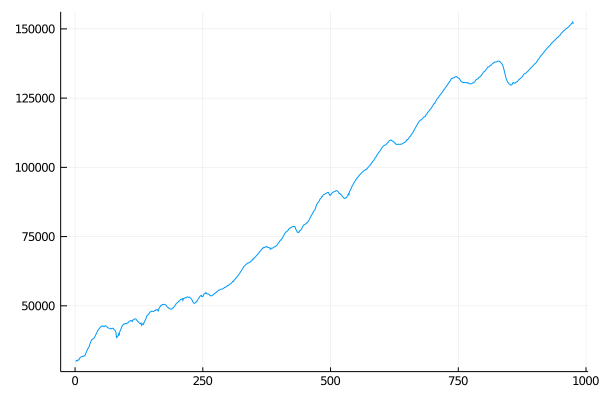

In [14]:
using Plots

ces_plot_data = ces_data[ces_data.series_id .== ces_data[1,1], :]

ces_plot = plot(ces_plot_data.value, legend=false, formatter=:plain)

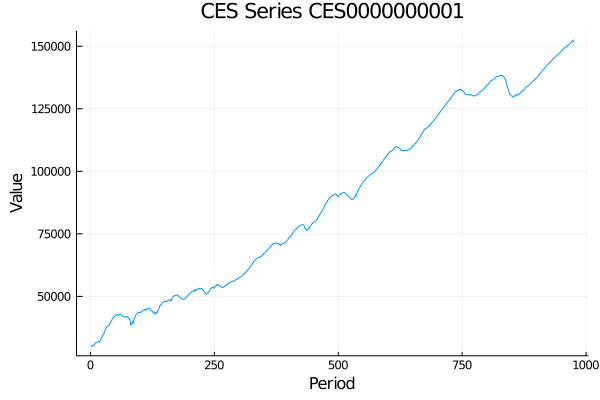

In [12]:
ces_plot = plot(
    ces_plot_data.value,
    legend=false,
    formatter=:plain,
    xlabel="Period",
    ylabel="Value",
    title="CES Series CES0000000001"
)

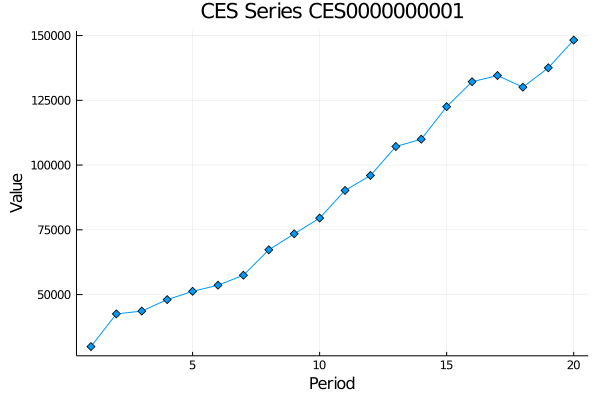

In [13]:
ces_plot = plot(
    ces_plot_data.value[1:50:end],
    legend=false,
    formatter=:plain,
    xlabel="Period",
    ylabel="Value",
    title="CES Series CES0000000001",
    markershape=:diamond
)

### Composing Functions

It's generally advisable to divide your code into discrete functions, each with its own purpose, as opposed to composing your code as one big chunk of operations. There are numerous reasons for this but, in Julia, this will result in significant performance gains and will generally result in code that is easier to understand and maintain.

There are a few ways to compose functions in Julia but I'll only cover the most common way here. With this method, every function starts with the word ```function``` followed by its name as well as a set of parentheses which enclose any parameters. Functions conclude with the word ```end``` as you will see below. The ```end``` keyword in Julia is used to mark the conclusion of a block of expressions (e.g. ```for``` loops, functions, modules, etc.).

Let's write a function that performs a mathematical operation on the ```values``` column in our ```ces_data``` DataFrame:

In [15]:
function change_value(value)
    return value / 2 + 3
end

change_value (generic function with 1 method)

In [16]:
change_value(ces_data[1,:value])

14964.5

In [17]:
function check_value(value, threshold)
    t = threshold * 1.5 * 75000
    if value > t
        return value
    else
        return t
    end
end

check_value (generic function with 1 method)

In [18]:
# ces_data[1,:value] == 29923
check_value(ces_data[1,:value], 0.9)

101250.0